# Cristian Pulido
# cpulido@unal.edu.co
## Punto 1

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

%matplotlib inline

def e(x):
    if x<-10:
        return 999999
    else:
        return np.exp(-x)
def relu(x):
    return max(0,x)
def sigmoid(x):
    return 1.0/(1+e(x))
def forward_propagate(x, w):
    '''
    x: input value for neuron 5
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    Returns: a pair of arrays (a, z), where 
             a has the activation values for each neuron, and
             z the output values for each neuron
    '''
    z = np.zeros(5)
    a = np.zeros(5)
    a[4]=x
    z[4]=x
    a[2]=w[5]*z[4]
    z[2]=sigmoid(a[2])
    a[3]=w[6]*z[4]
    z[3]=sigmoid(a[3])
    a[1]=w[3]*z[2]+w[4]*z[3]
    z[1]=relu(a[1])
    a[0]=w[0]*z[2]+w[1]*z[1]+w[2]*z[3]
    z[0]=sigmoid(a[0])
    return (a, z)

def bp(x, y, w):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    Returns: an array delta with the delta values for each
             neuron
    '''
    delta = np.zeros(5)
    a,z = forward_propagate(x,w)
    delta[0] = -2*(y-z[0])*z[0]*(1-z[0])
    if a[1]<0:
        delta[1]=0
    else:
        delta[1]=delta[0]*w[1]   
    delta[2]=z[2]*(1-z[2])*(delta[0]*w[0]+delta[1]*w[3])
    delta[3]=z[3]*(1-z[3])*(delta[0]*w[2]+delta[1]*w[4])
    delta[4]=z[4]*(1-z[4])*(delta[2]*w[5]+delta[3]*w[6])
    return delta
def train_step(x, y, w, eta):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    eta: learning rate
    Returns: updated w array
    '''
    # Calculate dw
    # Your code here
    dw = np.zeros(7)
    delta = bp(x,y,w)
    z=forward_propagate(x,w)[1]
    dw[0] = delta[0]*z[2]
    dw[1] = delta[0]*z[1]
    dw[2] = delta[0]*z[3]
    dw[3] = delta[1]*z[2]
    dw[4] = delta[1]*z[3]
    dw[5] = delta[2]*z[4]
    dw[6] = delta[3]*z[4]
    w = w - eta*dw
    return w


In [2]:
data=np.loadtxt('samples_assign4.txt')

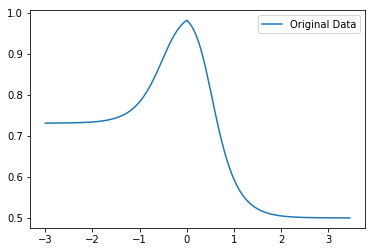

In [3]:
plt.plot(data[:,0],data[:,1],label='Original Data')
plt.title('')
plt.legend()
plt.show()


Pesos finales
[   -6.99971775     4.99981633     8.00034402     2.99718443
    -3.00250717 -1293.            -3.00020458]


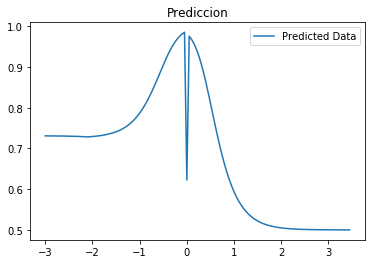

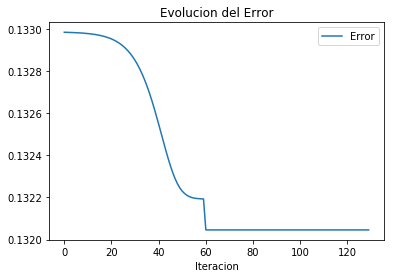

In [4]:
m=data.shape[0]
def costo(w):
    predict=np.zeros(m)
    for i in range(m):
        predict[i]=forward_propagate(data[i][0],w)[1][0]
    return sum((data[:,1]-predict)**2)
w=np.array([   -7, 5,8,3,-3, -1293,    -3])
#w=np.array([-6.90735103,4.75746636,7.96948667,2.91901062,-2.93234473,-1293.22436525,    -2.98924428])
eta=0.01
costos=np.zeros(m)
for i in range(m):
    w=train_step(data[i][0],data[i][1],w,eta)
    costos[i]=costo(w)
print("Pesos finales")        
print(w)
salida = np.zeros(m)
for i in range(m):
    salida[i] = forward_propagate(data[i][0],w)[1][0]
plt.plot(data[:,0],salida,label='Predicted Data')
plt.title('Prediccion')
plt.legend()
plt.show()
plt.plot(costos,label="Error")
plt.title("Evolucion del Error")
plt.legend()
plt.xlabel("Iteracion")
plt.show()

## 2 Punto

In [5]:
def hangman(word):
    ### your code here
    size=len(word)
    vacios= [i for i,x in enumerate(word) if x=='_']
    return vacios

In [6]:
hangman("ab_c_")

[2, 4]

## 3 Punto
### Direct prediction

In [7]:
import keras
from keras.applications import mobilenet
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


('image batch size', (1, 224, 224, 3))
[[(u'n01796340', u'ptarmigan', 0.57526696), (u'n02110341', u'dalmatian', 0.31309876), (u'n01819313', u'sulphur-crested_cockatoo', 0.029813604), (u'n02134084', u'ice_bear', 0.019334035), (u'n01632777', u'axolotl', 0.010368787)]]


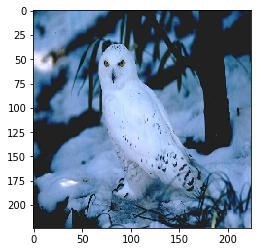

In [8]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
filename = 'birds/owl/owl001.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

# prepare the image for the model
processed_image = mobilenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print (label)

In [9]:
import os
from collections import Counter

def classificador(x):
    result=[]
    samples = os.listdir("birds/"+x)
    for i in samples:
        filename = "birds/"+x+"/"+i
        original = load_img(filename, target_size=(224, 224))
        numpy_image = img_to_array(original)
        image_batch = np.expand_dims(numpy_image, axis=0)
        processed_image = mobilenet.preprocess_input(image_batch.copy())
        predictions = mobilenet_model.predict(processed_image)
        label = decode_predictions(predictions)[0][0][1].encode('ascii','ignore')
        result.append(label)
    return result

In [10]:
aves=['egret','mandarin','owl','puffin','toucan','wood_duck']
label=[]
predict=[]
for i in aves:
    A=classificador(i)
    predict+=A
    B=[i]*len(A)
    label+=B
    

In [11]:
from collections import Counter
common=Counter(predict).most_common(10)## 10 predicciones mas frecuentes
common

[('drake', 188),
 ('toucan', 118),
 ('American_egret', 89),
 ('ptarmigan', 36),
 ('albatross', 19),
 ('magpie', 16),
 ('African_grey', 16),
 ('great_grey_owl', 13),
 ('water_ouzel', 9),
 ('goose', 7)]

In [12]:
import pandas as pd
com=[]
for i in range(10):
    com.append(common[i][0])
m=np.zeros((6,10))
for i in range(6):
    for j in range(10):
        contador=0
        for k in range(i*100,(i+1)*100):
            if predict[k]==common[j][0]:
                contador+=1
        m[i][j]=contador
names = [_ for _ in aves]
df = pd.DataFrame(m, index=names, columns=com)
df.to_csv('df.csv', index=True, header=True, sep=' ')
df

,drake,toucan,American_egret,ptarmigan,albatross,magpie,African_grey,great_grey_owl,water_ouzel,goose
egret,0.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mandarin,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
owl,0.0,0.0,0.0,33.0,3.0,0.0,16.0,13.0,0.0,0.0
puffin,12.0,22.0,0.0,3.0,15.0,15.0,0.0,0.0,8.0,5.0
toucan,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wood_duck,96.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Transfer learning

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.utils import to_categorical
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications import mobilenet
conv_base = mobilenet.MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))

train_dir = 'birds2/train/'
validation_dir = 'birds2/test/'

# Freeze all the layers
for layer in conv_base.layers[:]:
    layer.trainable = False

from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(conv_base)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               12845312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 16,075,718
Trainable params: 12,846,854
Non-trainable params: 3,228,864
_________________________________________________________________


Found 480 images belonging to 6 classes.
Found 120 images belonging to 6 classes.
Epoch 1/5
4/4 [==============================] - 75s 19s/step - loss: 6.1377 - acc: 0.3121 - val_loss: 3.9890 - val_acc: 0.5583
Epoch 2/5
4/4 [==============================] - 78s 20s/step - loss: 2.6585 - acc: 0.6550 - val_loss: 0.2776 - val_acc: 0.8917
Epoch 3/5
4/4 [==============================] - 80s 20s/step - loss: 0.1496 - acc: 0.9535 - val_loss: 0.1078 - val_acc: 0.9583
Epoch 4/5
4/4 [==============================] - 81s 20s/step - loss: 0.1147 - acc: 0.9616 - val_loss: 0.1076 - val_acc: 0.9583
Epoch 5/5
4/4 [==============================] - 81s 20s/step - loss: 0.0885 - acc: 0.9707 - val_loss: 0.1090 - val_acc: 0.9667


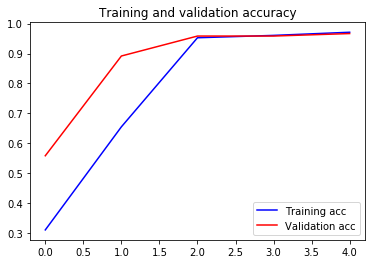

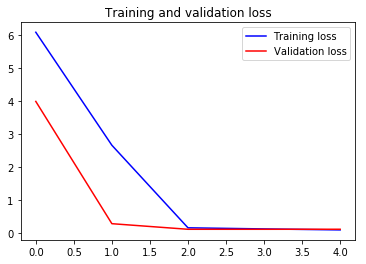

In [14]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 120 images belonging to 6 classes.
12/12 [==============================] - 20s 2s/step
No of errors = 4/120


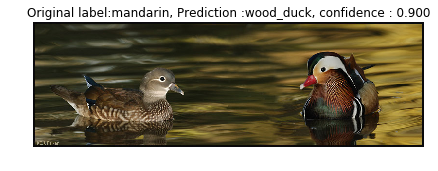

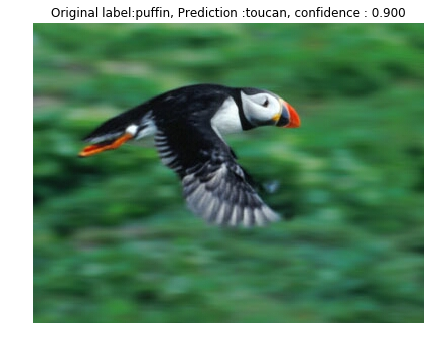

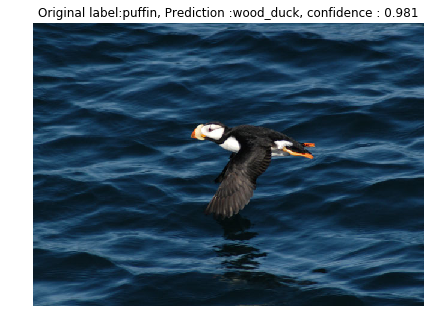

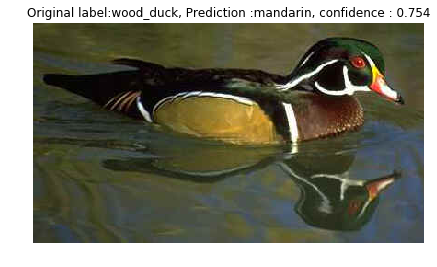

In [15]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ground_truth,predicted_classes)

array([[20,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  1],
       [ 0,  0, 20,  0,  0,  0],
       [ 0,  0,  0, 18,  1,  1],
       [ 0,  0,  0,  0, 20,  0],
       [ 0,  1,  0,  0,  0, 19]])

Como se ve en la matriz de confusion la mayoria de los ejemplos de validacion fueron bien clasificados, salvo los que se muestran anteriormente.
Cuando se usan mas Epoch el error de clasificacion disminuye por lo tanto la cantidad de imagenes mal clasificadas en menor.

### Fine Tuning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.utils import to_categorical
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications import mobilenet

train_dir = 'birds2/train/'
validation_dir = 'birds2/test/'

from keras import models
from keras import layers
from keras import optimizers

conv_base = mobilenet.MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(conv_base)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               12845312  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1542      
Total params: 16,075,718
Trainable params: 16,053,830
Non-trainable params: 21,888
_________________________________________________________________


Found 480 images belonging to 6 classes.
Found 120 images belonging to 6 classes.
Epoch 1/5
48/48 [==============================] - 227s 5s/step - loss: 2.5573 - acc: 0.6208 - val_loss: 0.1616 - val_acc: 0.9500
Epoch 2/5
48/48 [==============================] - 248s 5s/step - loss: 0.1815 - acc: 0.9479 - val_loss: 0.2844 - val_acc: 0.9167
Epoch 3/5
48/48 [==============================] - 243s 5s/step - loss: 0.2174 - acc: 0.9437 - val_loss: 0.2117 - val_acc: 0.9583
Epoch 4/5
48/48 [==============================] - 243s 5s/step - loss: 0.0664 - acc: 0.9854 - val_loss: 0.1849 - val_acc: 0.9500
Epoch 5/5
48/48 [==============================] - 282s 6s/step - loss: 0.0487 - acc: 0.9833 - val_loss: 0.1841 - val_acc: 0.9667


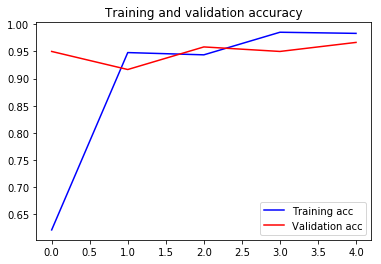

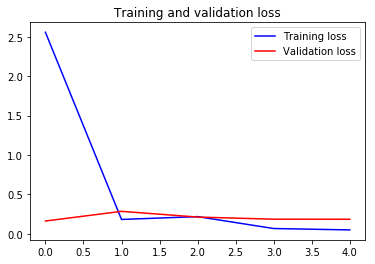

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 10
val_batchsize = 1

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('last4_layers.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 120 images belonging to 6 classes.
120/120 [==============================] - 21s 172ms/step
No of errors = 4/120


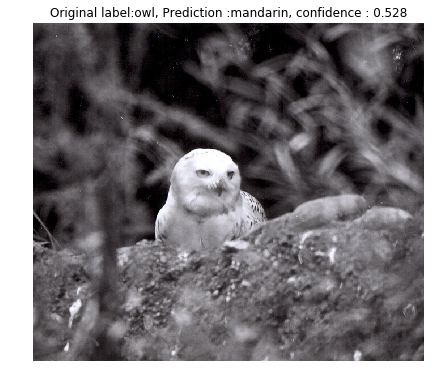

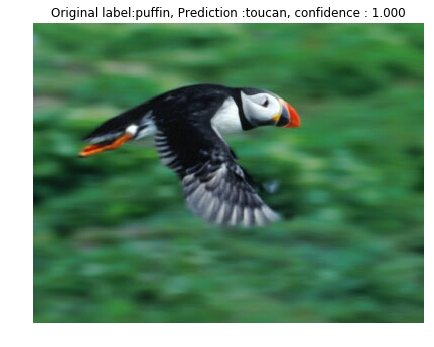

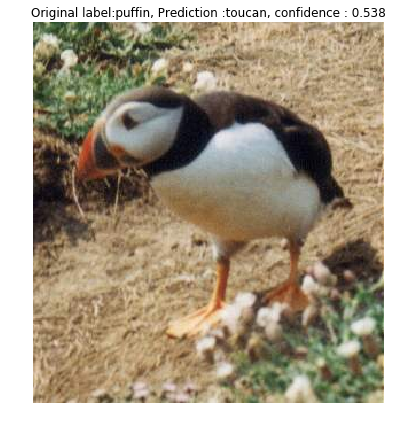

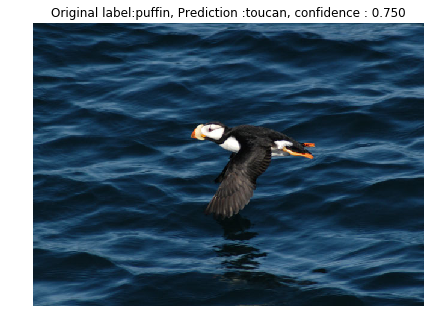

In [4]:
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ground_truth,predicted_classes)

array([[20,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0],
       [ 0,  1, 19,  0,  0,  0],
       [ 0,  0,  0, 17,  3,  0],
       [ 0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0, 20]])

La cantidad de imagenes que clasifico erroneamente no hc cambiado de forma significativa, pero si se ve un cambio en el error y el acuraccy, resulta mejor solo entrenando las nuevas capas.